
# Om å finne illustrasjoner i bøker fra NB digital

Fra en oversikt over alle illustrasjoner i NB-digital (ca. 480 000 bøker) kan vi studere selve illustrasjonene. Hva som kan vises er avhengig av tilgangsnivå, og hvor vi er, på jobb på NB eller på privatmaskin. 

Det frie materialet kan nås fra hvor som helst, mens det som har restriksjoner også er begrenset innad i NB. For begrenset materiale er det kun mulig å få ut deler av en illustrasjon, men det er mulig å mekke det til så man får sett alt. Foreløpig er ikke det gjort. 

### Litt startkode

In [3]:
import dhlab.module_update as mu
mu.update("nbpictures", silent = True)
from nbpictures import show_illustrations_urn, urns_from_super, load_picture, get_urls_from_illustration_data, get_illustration_data_from_book
import nbpictures as nbp
from IPython.display import HTML, Markdown, display
from skimage import data, io, filters, feature, color
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mu.css()

In [5]:
import imp

In [6]:
imp.reload(nbp)

<module 'nbpictures' from 'C:\\Users\\yoons\\Documents\\Github\\illustrations_bokhylla\\nbpictures.py'>

In [7]:
small_scale = 0.59
large_scale = 1.58

In [12]:
def get_urls_from_illustration_data(illus, part = True, scale = None, cuts = True, cutout = None, delta = 0):
    """part sets size of output of page, if part is True it returns a cut out of image
    using position data in illus is a dictionary of with entries and values like this: 
    {'height': 270, 'hpos': 251, 'page': 'digibok_2017081626006_0018', 'resolution': 400, 'vpos': 791, 'width': 373} 
    the variable cuts, if true allows cropping of image - restricted images must not go over 1024 x 1024 pixels
    
    The variable cutout, if different from zero, picks out a part of the picture, specifically made for
    finding the signature part of illustrations.
    """
    
    urn = "URN:NBN:no-nb_" + illus['page']
    
    if scale == None:
        if illus['resolution'] >= 300 or illus['resolution'] < 100:
            scale = large_scale
        else:
            scale = small_scale
            
    height = int(illus['height']) + 2*delta
    width = int(illus['width']) + 2*delta
    vpos = int(illus['vpos']) - delta
    hpos = int(illus['hpos']) - delta
    
    # check cutout, then that value will take precedence
    if cutout != None:
        (widthc, heightc) = cutout
        vpos = vpos + width - widthc
        hpos = hpos + height - heightc
        width = widthc
        height = heightc
        
    if cuts != False:
        if width * scale > 1024:
            width = int(1024/scale)
        if height * scale > 1024:
            height = int(1024/scale)
            

    if part == True:
        # return cut out
        url = "https://www.nb.no/services/image/resolver/{urn}/{hpos},{vpos},{width},{height}/full/0/native.jpg".format(
            urn = urn, 
            width = int(width * scale), 
            height = int(height * scale), 
            vpos = int(vpos * scale), 
            hpos = int(hpos * scale)
        )
    else:
        # return whole page
        url = "https://www.nb.no/services/image/resolver/{urn}/full/0,{part}/0/native.jpg".format( part=part,
                urn = urn, width=illus['width'], height= illus['height'], vpos=illus['vpos'], hpos=illus['hpos'])
    
    return url

In [13]:
urns = nbp.urns_from_super("kivijarvi", period=('19200101', '19900101'), conditions = {'digitalAccessibleOnly':'true','profile':'wwwnbno'})

In [24]:
urns

['URN:NBN:no-nb_digibok_2010080508182',
 'URN:NBN:no-nb_digibok_2014121008131',
 'URN:NBN:no-nb_digibok_2013042338006',
 'URN:NBN:no-nb_digibok_2011052004025',
 'URN:NBN:no-nb_digibok_2013062706042',
 'URN:NBN:no-nb_digibok_2014063008114',
 'URN:NBN:no-nb_digibok_2011121308027',
 'URN:NBN:no-nb_digibok_2008060400085',
 'URN:NBN:no-nb_digibok_2007042500012',
 'URN:NBN:no-nb_digibok_2013061208073',
 'URN:NBN:no-nb_digibok_2013043007117',
 'URN:NBN:no-nb_digibok_2015101448005']

Konverter bøker til illustrasjonsdata

In [14]:
illustrations = get_illustration_data_from_book(urns[0])

In [15]:
books = {u:[get_urls_from_illustration_data(ill, cutout=None) for ill in get_illustration_data_from_book(u)[:20]] for u in urns[:5]}

In [16]:
books

{'URN:NBN:no-nb_digibok_2010080508182': ['https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0002/272,269,1023,1023/full/0/native.jpg',
  'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0003/196,237,1023,1023/full/0/native.jpg',
  'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0004/1009,376,1023,1023/full/0/native.jpg',
  'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0004/1054,2043,1023,1023/full/0/native.jpg',
  'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0005/211,231,1023,1023/full/0/native.jpg',
  'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0006/281,370,1023,1023/full/0/native.jpg',
  'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0013/1507,718,1023,880/full/0/native.jpg',
  'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0016/1841

In [18]:
pics = [y  for x in books for y in books[x]]
pics

['https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0002/272,269,1023,1023/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0003/196,237,1023,1023/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0004/1009,376,1023,1023/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0004/1054,2043,1023,1023/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0005/211,231,1023,1023/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0006/281,370,1023,1023/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0013/1507,718,1023,880/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010080508182_0016/1841,1193,1017,1023/full/0/native.jpg',
 'https://w

In [19]:
print(pics[50])

https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2013042338006_0045/221,448,1023,949/full/0/native.jpg


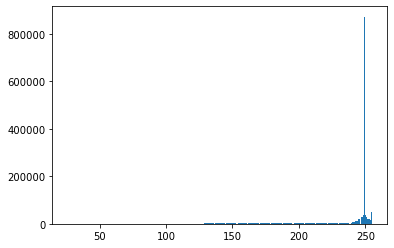

In [57]:
pic0 = io.imread(pics[81])

#io.imshow(pic0)

h = plt.hist(pic0.ravel(), bins = 256)
plt.show()

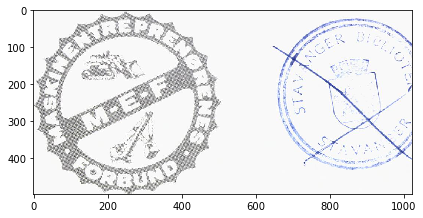

In [40]:
io.imshow(pic0)


In [41]:
len(h[0])

64

In [59]:
rel = pd.Series(h[0]*100/h[0].sum())

In [71]:
rel[40:80].describe()

count    40.000000
mean      0.009550
std       0.007101
min       0.000000
25%       0.003876
50%       0.008277
75%       0.014797
max       0.023847
dtype: float64

In [60]:
h[0].max(),h[0].min(), h[0].mean()

(871614.0, 0.0, 5946.1875)

In [61]:
h[1].max(),h[1].min(), h[1].mean()

(255.0, 26.0, 140.5)

<AxesSubplot:>

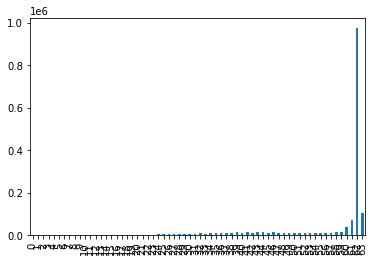

In [47]:
pd.Series(h[0]).plot(kind='bar')

In [131]:
pd.Series(h[0]).sum()

2912481.0

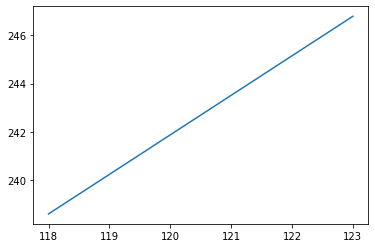

In [123]:
pd.Series(h[1])[118:124].plot()

In [212]:
hog0 = feature.hog(pic0, feature_vector = False)

In [213]:
hog0

array([[[[[6.25432404e-03, 0.00000000e+00, 5.23282472e-02, ...,
           9.00800782e-02, 5.13757139e-02, 8.51926842e-02],
          [1.29231123e-02, 1.36650407e-02, 4.17418189e-02, ...,
           0.00000000e+00, 5.97002376e-03, 2.02883383e-02],
          [3.74644021e-02, 0.00000000e+00, 3.83056974e-02, ...,
           1.49607266e-02, 8.87933619e-03, 2.73283376e-03]],

         [[2.77312351e-03, 7.02994301e-03, 1.27230652e-02, ...,
           6.99847955e-03, 7.73543606e-03, 0.00000000e+00],
          [1.12118426e-03, 1.22377603e-02, 6.94946515e-03, ...,
           1.38181563e-02, 2.71927132e-03, 0.00000000e+00],
          [3.62893015e-03, 9.80447209e-04, 2.12876179e-03, ...,
           0.00000000e+00, 9.80447209e-04, 2.77312351e-03]],

         [[2.17541706e-03, 6.08047561e-04, 3.46106693e-03, ...,
           2.69194106e-03, 0.00000000e+00, 0.00000000e+00],
          [1.63156279e-03, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
    

In [52]:
corner0 = feature.corner_fast(color.rgb2gray(pic0))

In [32]:
from nbpictures import iiif_manifest

In [40]:
s = "<td>{i}</td>".format(i = 2)
s

'<td>2</td><td>2</td><td>2</td><td>2</td>'

In [103]:
def display_books(books, width = 100):
    """A dictionary of urns - urls is displayed """
    
    html_wrapper = lambda x: """<style>
    img {{
        width:{mxw}px;
        height:auto;
        max-widht:}}
    </style>
    <body>{body}</body>""".format(body = x, mxw = width)

    div_wrapper = lambda x: """<div>{div_content}</div>""".format(div_content = x)
    book_divs = ""
    for u in books:
        mf = iiif_manifest(u)
        thumbnail = "<img src = '{thumbnail}'></img>".format(thumbnail = mf['thumbnail']['@id'])
        metainfo =  '\n'.join(["<b>{label}</b>{val}".format(label = x['label'], val = x['value']) for x in mf['metadata']])        
        imgs = '\n'.join(["<img src='{img_http}'></img>".format(img_http = pic_url) for pic_url in books[u]])
        book_divs += div_wrapper(thumbnail + metainfo + imgs)
    return html_wrapper(book_divs)

In [134]:
def markdown_books(books, width = 100):
    """A dictionary of urns - urls is displayed """
    
    markdown_wrapper = lambda x: """
    <body>{body}</body>""".format(body = x)

    div_wrapper = lambda x: """<div>{div_content}</div>""".format(div_content = x)
    book_divs = ""
    for u in books:
        mf = iiif_manifest(u)
        thumbnail = "<h3>Forside</h3> <img src='{thumbnail}'></img> <h3>Metadata</h3>".format(thumbnail = mf['thumbnail']['@id'])
        metainfo =  '\n'.join([" <b>{label}</b> {val}".format(label = x['label'], val = x['value']) for x in mf['metadata']])        
        imgs = '\n'.join(["<img style='float:right' src='{img_http}' width = {width}></img>".format(img_http = pic_url, width = width) for pic_url in books[u]])
        book_divs += div_wrapper(thumbnail + metainfo + imgs)
    return book_divs

In [104]:
with open('illus.html', 'w') as f:
    f.write(display_books(books, width = 250))

In [222]:
Markdown(markdown_books(books, width = 250))

<div><h3>Forside</h3> <img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_C1/full/0,200/0/native.jpg'></img> <h3>Metadata</h3> <b>Tilgang</b> Tilgang for norske IP-adresser
 <b>Tittel</b> Lillebror og Knerten. 1
 <b>Forfatter</b> Vestly, Anne-Cath.
 <b>Publisert</b> [Stabekk]:Bokklubbens barn, 1990
 <b>Andre opplysninger</b> Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2010-09-08

 <b>Språk</b> Norsk (Bokmål)
 <b>ISBN</b> 8252515746
 <b>Kilde for metadata</b> nb.bibsys.no (<a title="Link til post i Oria" href="https://www.oria.no/?vid=NB&search=999003094664702202">999003094664702202</a>)
 <b>Omfang</b> 200 s.
 <b>Medietype</b> bøker
 <b>Dewey</b> 839.823
 <b>Varig lenke</b> <a href="https://urn.nb.no/URN:NBN:no-nb_digibok_2010071608086" target="_blank">https://urn.nb.no/URN:NBN:no-nb_digibok_2010071608086</a>
 <b></b> <a href="https://www.nb.no/items/6693de15b357426e0ba947aeee9660b0?manifest=https://api.nb.no/catalog/v1/iiif/6693de15b357426e0ba947aeee9660b0/manifest" target="_blank"><img src="https://www.nb.no/content/uploads/2018/08/logo-iiif.png" alt="IIIF Drag-n-drop"></a><img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0005/672,1361,440,631/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0009/1160,429,538,482/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0013/201,288,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0021/243,431,1023,613/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0024/338,427,1023,966/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0025/615,706,531,467/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0026/1478,405,331,517/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0028/299,343,1023,988/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0030/1257,472,573,394/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0033/231,454,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0038/723,1726,604,533/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0039/1070,483,627,478/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0041/1078,1879,514,758/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0043/951,255,654,427/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0045/202,390,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0048/749,765,521,523/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0049/1196,493,468,441/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0054/366,349,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0057/405,1425,968,1001/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2010071608086_0058/1275,425,545,452/full/0/native.jpg' width = 250></img></div><div><h3>Forside</h3> <img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_C1/full/0,200/0/native.jpg'></img> <h3>Metadata</h3> <b>Tilgang</b> Tilgang for norske IP-adresser
 <b>Tittel</b> Lillebror og Knerten. 2
 <b>Forfatter</b> Vestly, Anne-Cath.
 <b>Publisert</b> [Stabekk]:Bokklubbens barn, 1990
 <b>Andre opplysninger</b> Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2015-11-05

 <b>Språk</b> Norsk (Bokmål)
 <b>ISBN</b> 8252515754
 <b>Kilde for metadata</b> nb.bibsys.no (<a title="Link til post i Oria" href="https://www.oria.no/?vid=NB&search=999003096604702202">999003096604702202</a>)
 <b>Omfang</b> 211 s.
 <b>Medietype</b> bøker
 <b>Dewey</b> 839.823
 <b>Varig lenke</b> <a href="https://urn.nb.no/URN:NBN:no-nb_digibok_2015010808013" target="_blank">https://urn.nb.no/URN:NBN:no-nb_digibok_2015010808013</a>
 <b></b> <a href="https://www.nb.no/items/c871a19b13d399950656aefd61fcc5c7?manifest=https://api.nb.no/catalog/v1/iiif/c871a19b13d399950656aefd61fcc5c7/manifest" target="_blank"><img src="https://www.nb.no/content/uploads/2018/08/logo-iiif.png" alt="IIIF Drag-n-drop"></a><img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0004/0,102,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0005/935,1385,753,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0008/4,26,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0009/799,336,899,559/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0016/229,270,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0018/206,222,1023,837/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0021/573,1271,699,553/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0022/1254,270,515,616/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0026/132,249,1023,692/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0029/83,172,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0032/175,221,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0034/729,744,543,813/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0035/707,246,984,647/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0040/251,246,1023,938/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0044/124,7,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0046/688,940,562,729/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0047/1216,232,464,655/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0049/303,1937,1023,785/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0052/188,158,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015010808013_0053/0,158,1023,1023/full/0/native.jpg' width = 250></img></div><div><h3>Forside</h3> <img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_C1/full/0,200/0/native.jpg'></img> <h3>Metadata</h3> <b>Tilgang</b> Tilgang for norske IP-adresser
 <b>Tittel</b> Lillebror og Knerten
 <b>Forfatter</b> Vestly, Anne-Cath.
 <b>Illustratør</b> Vestly, Johan
 <b>Publisert</b> Oslo:Tiden, 1962
 <b>Andre opplysninger</b> Opplagshistorikk:  2. oppl. 1965 (Nkr 12.30); 4. oppl. 1973 (Nkr 17.00); 5.  oppl. 1976 (Nkr 21.00); 6. oppl. 1978 (Nkr 23.00); 7.-8  oppl. 1979 (Nkr 29.00); 9. oppl. 1980 (Nkr 35.00); 10.  oppl. 1981 (Nkr 39.00); 11. oppl. 1982 (Nkr 44.00);  [Nytt] 11.-12. oppl. 1989; 13. oppl. 1993 (Nkr 98.00);  14. oppl. 1995
Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2010-12-24

 <b>Språk</b> Norsk (Bokmål)
 <b>ISBN</b> 8210004328
 <b>Kilde for metadata</b> nb.bibsys.no (<a title="Link til post i Oria" href="https://www.oria.no/?vid=NB&search=998901948584702202">998901948584702202</a>)
 <b>Omfang</b> 135 s. ill.
 <b>Medietype</b> bøker
 <b>Varig lenke</b> <a href="https://urn.nb.no/URN:NBN:no-nb_digibok_2007050804065" target="_blank">https://urn.nb.no/URN:NBN:no-nb_digibok_2007050804065</a>
 <b></b> <a href="https://www.nb.no/items/02c16e8137a1e91e6d3e0232150176fb?manifest=https://api.nb.no/catalog/v1/iiif/02c16e8137a1e91e6d3e0232150176fb/manifest" target="_blank"><img src="https://www.nb.no/content/uploads/2018/08/logo-iiif.png" alt="IIIF Drag-n-drop"></a><img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0001/383,1926,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0005/1180,347,553,492/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0009/180,303,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0014/1519,331,263,613/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0017/235,395,1023,616/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0020/290,344,1023,1006/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0021/668,1246,548,470/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0022/1458,436,341,527/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0024/273,338,1023,1019/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0026/1245,447,581,401/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0029/9,387,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0034/699,2000,619,534/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0035/1034,434,643,488/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0037/1003,1921,546,790/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0039/981,268,671,437/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0041/142,293,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0044/756,925,548,541/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0045/1181,462,480,456/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0050/347,366,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2007050804065_0053/426,1644,987,1023/full/0/native.jpg' width = 250></img></div><div><h3>Forside</h3> <img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_C1/full/0,200/0/native.jpg'></img> <h3>Metadata</h3> <b>Tilgang</b> Tilgang for norske IP-adresser
 <b>Tittel</b> Trofaste Knerten
 <b>Forfatter</b> Vestly, Anne-Cath.
 <b>Medforfatter/Bidragsyter</b> Vestly, Johan
 <b>Publisert</b> [Oslo]:Tiden, 1968
 <b>Andre opplysninger</b> Fortsettelse av: Lillebror og Knerten
Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2017-06-16

 <b>Språk</b> Norsk (Bokmål)
 <b>Kilde for metadata</b> nb.bibsys.no (<a title="Link til post i Oria" href="https://www.oria.no/?vid=NB&search=990111803154702202">990111803154702202</a>)
 <b>Omfang</b> 133 s. ill.
 <b>Medietype</b> bøker
 <b>Varig lenke</b> <a href="https://urn.nb.no/URN:NBN:no-nb_digibok_2017053048056" target="_blank">https://urn.nb.no/URN:NBN:no-nb_digibok_2017053048056</a>
 <b></b> <a href="https://www.nb.no/items/d11803021a46f39716526a0ed120524b?manifest=https://api.nb.no/catalog/v1/iiif/d11803021a46f39716526a0ed120524b/manifest" target="_blank"><img src="https://www.nb.no/content/uploads/2018/08/logo-iiif.png" alt="IIIF Drag-n-drop"></a><img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0002/718,2207,1023,448/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0003/899,1132,764,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0007/480,221,1023,617/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0010/113,181,1023,935/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0013/83,197,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0015/609,1444,644,578/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0016/1185,301,543,633/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0021/290,158,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0024/872,195,914,652/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0027/237,191,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0032/233,1414,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0035/571,1673,712,595/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0036/1150,206,638,632/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0039/153,165,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0042/248,42,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0047/477,2125,906,554/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0048/1027,183,731,627/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0051/153,180,1023,818/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0054/511,154,853,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2017053048056_0056/205,1610,1023,1023/full/0/native.jpg' width = 250></img></div><div><h3>Forside</h3> <img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_C1/full/0,200/0/native.jpg'></img> <h3>Metadata</h3> <b>Tilgang</b> Tilgang for norske IP-adresser
 <b>Tittel</b> Knerten og forundringspakken
 <b>Forfatter</b> Vestly, Anne-Cath.
 <b>Illustratør</b> Vestly, Johan
 <b>Publisert</b> Oslo:Tiden, 1973
 <b>Andre opplysninger</b> Opplagshistorikk: 2. oppl. 1975 (Nkr 21.00); 3. oppl. 1978 (Nkr 23.00); 4. oppl. 1979 (Nkr 29.00); 5. oppl. 1980 (Nkr 35.00); 6. oppl. 1981 (Nkr 39.00); 8. oppl. 1989 (Nkr 84.00); 9. oppl. 1991 (Nkr 89.00)
Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2010-07-25

 <b>Språk</b> Norsk (Bokmål)
 <b>ISBN</b> 8210007750
 <b>Kilde for metadata</b> nb.bibsys.no (<a title="Link til post i Oria" href="https://www.oria.no/?vid=NB&search=999115344904702202">999115344904702202</a>)
 <b>Omfang</b> 142 s. ill.
 <b>Medietype</b> bøker
 <b>Dewey</b> 839.823,  839.93
 <b>Varig lenke</b> <a href="https://urn.nb.no/URN:NBN:no-nb_digibok_2008052804024" target="_blank">https://urn.nb.no/URN:NBN:no-nb_digibok_2008052804024</a>
 <b></b> <a href="https://www.nb.no/items/0dce2b30cebec852faf4d0f7ef29879d?manifest=https://api.nb.no/catalog/v1/iiif/0dce2b30cebec852faf4d0f7ef29879d/manifest" target="_blank"><img src="https://www.nb.no/content/uploads/2018/08/logo-iiif.png" alt="IIIF Drag-n-drop"></a><img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0001/22,245,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0005/254,1572,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0009/1160,276,485,811/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0013/155,286,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0018/775,2583,641,431/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0019/964,411,728,646/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0023/237,347,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0029/67,214,1023,995/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0033/480,288,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0036/820,1814,475,768/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0037/860,337,798,834/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0041/640,155,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0046/754,2174,592,634/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0047/1016,289,659,814/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0051/318,223,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0055/188,266,1023,972/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0057/429,2283,1023,490/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0058/977,170,804,867/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0063/88,282,1023,1023/full/0/native.jpg' width = 250></img>
<img style='float:right' src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2008052804024_0067/174,196,1023,1023/full/0/native.jpg' width = 250></img></div>

In [32]:
show_illustrations_urn(urns[0], 'fr')

**Tilgang**: Tilgang for norske IP-adresser
**Tittel**: Christiania skiklub, 1877-1977
**Publisert**: Moestue, 1977
**Emne**: oslo | jubileum | klubber | skiidrett | Christiania skiklub
**Andre opplysninger**: Elektronisk reproduksjon [Norge] Nasjonalbiblioteket Digital 2015-06-03

**Språk**: Norsk (Bokmål)
**Kilde for metadata**: nb.bibsys.no (<a title="Link til post i Oria" href="https://www.oria.no/?vid=NB&search=998520227944702202">998520227944702202</a>)
**Omfang**: 175 s. ill.
**Medietype**: bøker
**Dewey**: 796.93
**UDC**: 796.92(09), 796(09):061.2, 796.92.06, (09), (481.13)
**Varig lenke**: <a href="https://urn.nb.no/URN:NBN:no-nb_digibok_2015051308316" target="_blank">https://urn.nb.no/URN:NBN:no-nb_digibok_2015051308316</a>
****: <a href="https://www.nb.no/items/760e96b4caa3a54840c3d28790caeac4?manifest=https://api.nb.no/catalog/v1/iiif/760e96b4caa3a54840c3d28790caeac4/manifest" target="_blank"><img src="https://www.nb.no/content/uploads/2018/08/logo-iiif.png" alt="IIIF Drag-n-drop"></a>

"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015051308316_0004/0,671,1023,984/full/0/native.jpg'"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015051308316_0004/0,1944,1023,1023/full/0/native.jpg'"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015051308316_0005/834,1262,366,448/full/0/native.jpg'"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015051308316_0006/0,330,1023,1023/full/0/native.jpg'"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015051308316_0022/349,368,1023,1023/full/0/native.jpg'"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015051308316_0030/342,265,881,1023/full/0/native.jpg'"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015051308316_0033/195,281,1023,1023/full/0/native.jpg'"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015051308316_0035/1090,451,693,764/full/0/native.jpg'"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015051308316_0040/342,2079,1023,815/full/0/native.jpg'"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015051308316_0046/380,505,1023,1023/full/0/native.jpg'"
"<img src='https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digibok_2015051308316_0048/366,1796,1023,959/full/0/native.jpg'"
